In [359]:
# Import necessary libraries
#remove .legacy if not M1 mac
import numpy as np
from keras.initializers import GlorotUniform
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers.legacy import SGD #MAC M1 compatible with legacy
from keras.callbacks import EarlyStopping
from keras.optimizers.legacy import Optimizer #MAC M1 compatible with legacy
import keras.backend as K
from keras.optimizers.legacy import Adagrad #MAC M1 compatible with legacy
from keras.optimizers.legacy import RMSprop #MAC M1 compatible with legacy
from keras.optimizers.legacy import Adam #MAC M1 compatible with legacy
from keras.utils import to_categorical
from keras.optimizers.legacy import Nadam

In [360]:
# Load data from CSV file

tdata=pd.read_csv("team13/task1/train_data.csv",header=None)
train_data=tdata.values
tlabels=pd.read_csv("team13/task1/train_label.csv",header=None)
train_labels=tlabels.values
tedata=pd.read_csv("team13/task1/test_data.csv",header=None)
test_data=tedata.values
telabels=pd.read_csv("team13/task1/test_label.csv",header=None)
test_labels=telabels.values
vdata=pd.read_csv("team13/task1/val_data.csv",header=None)
val_data=vdata.values
vlabels=pd.read_csv("team13/task1/val_label.csv",header=None)
val_labels=vlabels.values

num_classes = tlabels.iloc[:, 0].nunique()
train_labels=to_categorical(train_labels, num_classes)
test_labels=to_categorical(test_labels, num_classes)
val_labels=to_categorical(val_labels, num_classes)

In [361]:
# Define parameters
input_size = train_data.shape[1]
num_classes = tlabels.iloc[:, 0].nunique()
learning_rate = 0.01
stopping_threshold = 0.001
# print(input_size)

In [362]:
# Define function to build model
def build_model(h1_nodes, h2_nodes):
    model = Sequential([
        Dense(h1_nodes, input_shape=(input_size,), activation='tanh'),  # Hidden layer 1
        Dense(h2_nodes, activation='tanh'),  # Hidden layer 2
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

In [363]:
# Define function to train model with a specific weight update rule
def train_model(model, update_rule):
    # Compile model
    if update_rule == 'Delta':
        optimizer = SGD(learning_rate=learning_rate)
    elif update_rule == 'AdaGrad':
        optimizer = Adagrad(learning_rate=learning_rate, epsilon=1e-6)
    elif update_rule == 'RMSProp':
        optimizer = RMSprop(learning_rate=learning_rate, rho=0.9, epsilon=1e-6)
    elif update_rule == 'GenDelta':
        optimizer = SGD(learning_rate=learning_rate,momentum=0.9)
    elif update_rule == 'AdaM':
        optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.99, epsilon=1e-6)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=stopping_threshold, patience=5,mode='auto', restore_best_weights=True)

    
    # Train model
    history = model.fit(train_data, train_labels, verbose=0, epochs=200, validation_data=(val_data, val_labels),callbacks=[early_stopping])
    
    return history

In [364]:
def accuracy_from_confusion_matrix(confusion_matrix):
    diagonal_sum = np.trace(confusion_matrix)
    total_sum = np.sum(confusion_matrix)
    accuracy = diagonal_sum / total_sum
    return accuracy

In [365]:

# function for the learning rate
#flag for experimenting
#returns history object for plotting
def weight_update(model,update_rule,h1_nodes,h2_nodes,flag):
    # Build model
    # model = build_model(h1_nodes,h2_nodes)
    
    # Train model
    history = train_model(model, update_rule)

    # Calculate confusion matrix for training data
    train_pred = model.predict(train_data, verbose=0)
    train_pred_labels = np.argmax(train_pred, axis=1)
    train_true_labels = np.argmax(train_labels, axis=1)
    train_conf_matrix = confusion_matrix(train_true_labels, train_pred_labels)
    
    train_accuracy = accuracy_from_confusion_matrix(train_conf_matrix)
    

    # Calculate confusion matrix for validation data
    val_pred = model.predict(val_data, verbose=0)
    val_pred_labels = np.argmax(val_pred, axis=1)
    val_true_labels = np.argmax(val_labels, axis=1)
    val_conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)
    val_accuracy = accuracy_from_confusion_matrix(val_conf_matrix)


    if(flag):
        return val_accuracy,train_accuracy


    # Calculate confusion matrix for test data
    test_pred = model.predict(test_data, verbose=0)
    test_pred_labels = np.argmax(test_pred, axis=1)
    test_true_labels = np.argmax(test_labels, axis=1)
    test_conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)
    test_accuracy = accuracy_from_confusion_matrix(test_conf_matrix)

    # Print results and return loss
    print(f'Confusion matrix for training data with {update_rule}:\n{train_conf_matrix}')
    print("Train Accuracy:", train_accuracy)
    print()
    print(f'Confusion matrix for test data with {update_rule}:\n{test_conf_matrix}')
    print("Test Accuracy:", test_accuracy)
    print()
    print()
    return history.history

In [366]:
l1 = [50,60,70,100]
l2 = [20,30,40]
for i in l1:
    for j in l2:
            if(j>=i):
                continue
            model = build_model(i,j)
            print(f'val accuaracy, train accuracy for Delta rule with {i} and {j} nodes:', weight_update(model,'Delta',i,j,1))

val accuaracy, train accuracy for Delta rule with 50 and 20 nodes: (0.548, 0.5475)
val accuaracy, train accuracy for Delta rule with 50 and 30 nodes: (0.538, 0.561)
val accuaracy, train accuracy for Delta rule with 50 and 40 nodes: (0.542, 0.5375)
val accuaracy, train accuracy for Delta rule with 60 and 20 nodes: (0.544, 0.5575)
val accuaracy, train accuracy for Delta rule with 60 and 30 nodes: (0.546, 0.5625)
val accuaracy, train accuracy for Delta rule with 60 and 40 nodes: (0.55, 0.561)
val accuaracy, train accuracy for Delta rule with 70 and 20 nodes: (0.53, 0.5535)
val accuaracy, train accuracy for Delta rule with 70 and 30 nodes: (0.528, 0.558)
val accuaracy, train accuracy for Delta rule with 70 and 40 nodes: (0.544, 0.5595)
val accuaracy, train accuracy for Delta rule with 100 and 20 nodes: (0.544, 0.5595)
val accuaracy, train accuracy for Delta rule with 100 and 30 nodes: (0.536, 0.565)
val accuaracy, train accuracy for Delta rule with 100 and 40 nodes: (0.532, 0.5645)


In [367]:
#from the above accuracies h1=60 and h2=30 is the best model for Delta rule and not too complex
# using the same strucutre for all other rules
# Define weight update rules
update_rules = ['Delta','GenDetla', 'AdaGrad', 'RMSProp', 'AdaM']

In [368]:
h1_optimal = 60
h2_optimal = 30
model_delta = build_model(h1_optimal,h2_optimal)
#get weights for the model
init_weights = model_delta.get_weights()
model_gen_delta = build_model(h1_optimal,h2_optimal)
model_gen_delta.set_weights(init_weights)
model_adagrad = build_model(h1_optimal,h2_optimal)
model_adagrad.set_weights(init_weights)
model_rmsprop = build_model(h1_optimal,h2_optimal)
model_rmsprop.set_weights(init_weights)
model_adam = build_model(h1_optimal,h2_optimal)
model_adam.set_weights(init_weights)


history_delta = weight_update(model_delta,'Delta',h1_optimal,h2_optimal,0)
history_gen_delta = weight_update(model_gen_delta,'GenDelta',h1_optimal,h2_optimal,0)
history_adagrad = weight_update(model_adagrad,'AdaGrad',h1_optimal,h2_optimal,0)
history_rmsprop = weight_update(model_rmsprop,'RMSProp',h1_optimal,h2_optimal,0)
history_adam = weight_update(model_adam,'AdaM',h1_optimal,h2_optimal,0)




Confusion matrix for training data with Delta:
[[306  22  13  46  13]
 [ 23 220  35  85  37]
 [ 10  53 198  66  73]
 [ 69 105  61 134  31]
 [  5  25  95  25 250]]
Train Accuracy: 0.554

Confusion matrix for test data with Delta:
[[79  9  2  6  4]
 [ 4 48  9 24 15]
 [ 1  9 45 26 19]
 [20 22 10 44  4]
 [ 2  9 20  9 60]]
Test Accuracy: 0.552


Confusion matrix for training data with GenDelta:
[[298  49  16  26  11]
 [ 15 293  29  27  36]
 [  9  70 233  47  41]
 [ 58 140  61 104  37]
 [  3  50  66  11 270]]
Train Accuracy: 0.599

Confusion matrix for test data with GenDelta:
[[76 18  1  2  3]
 [ 3 62  7 12 16]
 [ 1 19 51 18 11]
 [18 48  7 20  7]
 [ 2 16 17  4 61]]
Test Accuracy: 0.54


Confusion matrix for training data with AdaGrad:
[[308  24  10  42  16]
 [ 23 228  30  76  43]
 [ 13  56 171  68  92]
 [ 70 113  56 129  32]
 [  5  30  81  25 259]]
Train Accuracy: 0.5475

Confusion matrix for test data with AdaGrad:
[[80  9  2  6  3]
 [ 4 50  7 22 17]
 [ 1 11 39 26 23]
 [23 24 10 37  6]
 [ 

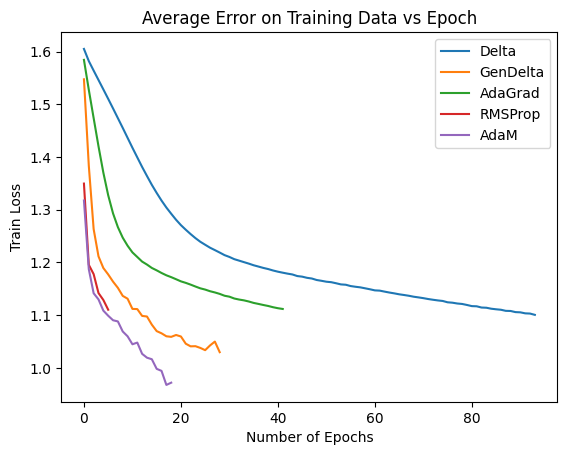

In [369]:

# Plot settings
plt.xlabel('Number of Epochs')
plt.ylabel('Train Loss')
plt.title('Average Error on Training Data vs Epoch')
plt.plot(history_delta['loss'], label='Delta')
plt.plot(history_gen_delta['loss'], label='GenDelta')
plt.plot(history_adagrad['loss'], label='AdaGrad')
# plt.legend()
# plt.show()
plt.plot(history_rmsprop['loss'], label='RMSProp')
plt.plot(history_adam['loss'], label='AdaM')

plt.legend()
plt.show()

In [370]:
print("number of epochs for Delta rule:",len(history_delta['val_loss']))
print("number of epochs for GenDelta rule:",len(history_gen_delta['val_loss']))
print("number of epochs for AdaGrad rule:",len(history_adagrad['val_loss']))
print("number of epochs for RMSProp rule:",len(history_rmsprop['val_loss']))
print("number of epochs for AdaM rule:",len(history_adam['val_loss']))



number of epochs for Delta rule: 94
number of epochs for GenDelta rule: 29
number of epochs for AdaGrad rule: 42
number of epochs for RMSProp rule: 6
number of epochs for AdaM rule: 19
